In [97]:
import yfinance as yf
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_iris
import csv
import shutil

In [98]:
# Specify the stock symbol and the desired date range
st = input("Que -accion? ")
desde= input("Desde que Fecha?(A-M-D) ")
hasta= input("Hasta que Fecha?(A-M-D) ")

stock_symbol = st
start_date = desde
end_date = hasta

In [99]:
# Retrieve the historical price data using yfinance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [112]:
df1 = stock_data
df1.to_csv(f'{st}_datos.csv')

current_loc = f'{st}_datos.csv'
new_loc = '/media/alozan/cosas/Git/Support_Levels/Data/' + current_loc
shutil.copy(current_loc, new_loc)




'/media/alozan/cosas/Git/Support_Levels/Data/pltr_datos.csv'

In [101]:
print(stock_data)

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-09-30  10.000000  11.410000   9.110000   9.500000   9.500000  338584400
2020-10-01   9.690000  10.100000   9.230000   9.460000   9.460000  124297600
2020-10-02   9.060000   9.280000   8.940000   9.200000   9.200000   55018300
2020-10-05   9.430000   9.490000   8.920000   9.030000   9.030000   36316900
2020-10-06   9.040000  10.180000   8.900000   9.900000   9.900000   90864000
...               ...        ...        ...        ...        ...        ...
2023-10-16  17.209999  17.459999  16.670000  17.360001  17.360001   44987300
2023-10-17  17.000000  18.030001  16.910000  17.840000  17.840000   54401300
2023-10-18  17.809999  18.219999  17.190001  17.200001  17.200001   44208300
2023-10-19  17.440001  17.580000  16.969999  17.059999  17.059999   46303200
2023-10-20  16.850000  16.940001  15.810000  16.110001  16.110001   63738300

In [103]:
def calculate_support_resistance(data):
    pivot_point = (data['High'] + data['Low'] + data['Close']) / 3
    support_l1 = (pivot_point * 2) - data['High']
    support_l2 = pivot_point - (data['High'] - data['Low'])
    resistance_l1 = (pivot_point * 2) - data['Low']
    resistance_l2 = pivot_point + (data['High'] - data['Low'])
    
    return pivot_point, support_l1, support_l2, resistance_l1, resistance_l2

pivot_point, support_l1, support_l2, resistance_l1, resistance_l2 = calculate_support_resistance(stock_data)


In [104]:
# Create a DataFrame to store the calculated levels
levels_data = pd.DataFrame({'Pivot Point': pivot_point,
                            'Support Level 1': support_l1,
                            'Support Level 2': support_l2,
                            'Resistance Level 1': resistance_l1,
                            'Resistance Level 2': resistance_l2})


In [105]:
df2= levels_data
df2.to_csv(f'{st}_levels.csv')

current_loc = f'{st}_levels.csv'
new_loc = '/media/alozan/cosas/Git/Support_Levels/Data/' + current_loc
shutil.copy(current_loc, new_loc)


'/media/alozan/cosas/Git/Support_Levels/Data/pltr_levels.csv'

In [106]:

print(levels_data)

            Pivot Point  Support Level 1  Support Level 2  Resistance Level 1  \
Date                                                                            
2020-09-30    10.006667         8.603333         7.706666           10.903333   
2020-10-01     9.596667         9.093333         8.726666            9.963334   
2020-10-02     9.140000         9.000000         8.800000            9.340000   
2020-10-05     9.146667         8.803333         8.576667            9.373333   
2020-10-06     9.660000         9.139999         8.379999           10.420000   
...                 ...              ...              ...                 ...   
2023-10-16    17.163333        16.866667        16.373334           17.656666   
2023-10-17    17.593334        17.156666        16.473333           18.276667   
2023-10-18    17.536667        16.853334        16.506668           17.883333   
2023-10-19    17.203333        16.826666        16.593332           17.436666   
2023-10-20    16.286667     

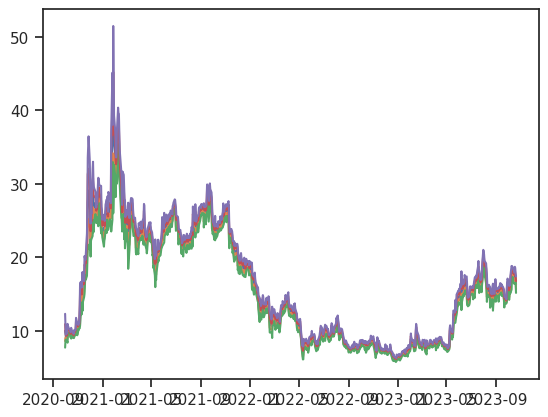

In [107]:
plt.plot(levels_data);
